In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from IPython.display import display
from PIL import Image
import pandas as pd

In [4]:
img  = Image.open("/content/gdrive/MyDrive/TP_Fuzzy_C_Means/milky-way-nvg.jpg")
img3D = Image.open("/content/gdrive/MyDrive/TP_Fuzzy_C_Means/milky-way.jpg")

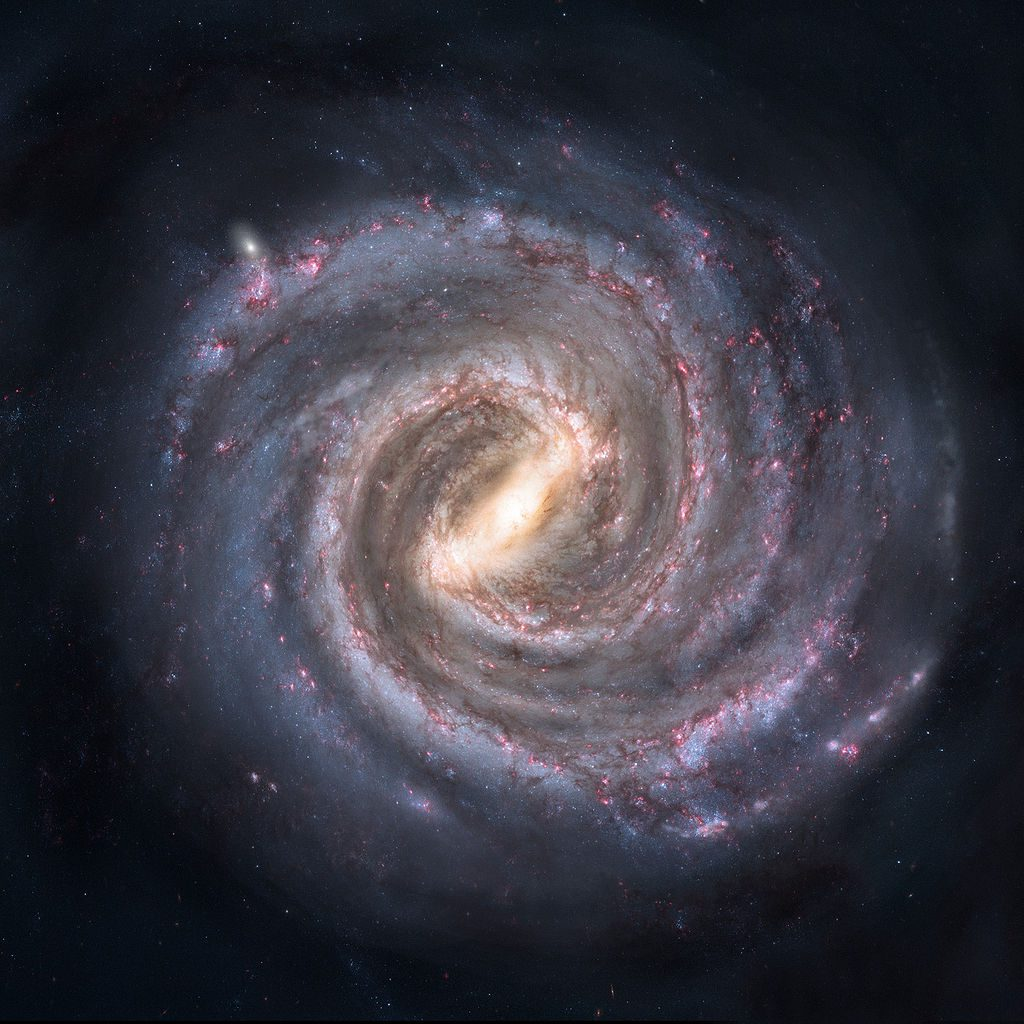

Image shape: (1024, 1024, 3)


In [6]:
display(img3D)
print("Image shape:", np.array(img3D).shape)

In [16]:
pixels_vectorRGB = np.array(img3D).reshape(-1, 3)
print("Shape of the pixel vector:", pixels_vectorRGB.shape)

Shape of the pixel vector: (1048576, 3)


np.uint8(111)

In [17]:
#pre-traitement


# Initialization of U matrix
# k : number of clusters

def initialize_membership_matrix(num_pixels, k):

    U = np.random.rand(num_pixels, k) + 0.001
    U = U / np.sum(U, axis=1, keepdims=True)
    return U

num_pixels = pixels_vectorRGB.shape[0]
U_initial = initialize_membership_matrix(num_pixels, k)
print("Shape of the initial membership matrix U:", U_initial.shape)


Shape of the initial membership matrix U: (1048576, 3)


In [32]:
#Vector centroids

def computeCentroids(u_matrix, C, pixels_vectorRGB, d=3):
    centroides = C

    for j in range(k):
        numerator = np.zeros(d)
        denominator = 0

        for i in range(pixels_vectorRGB.shape[0]):
            u_power_m = u_matrix[i, j] ** m
            numerator += u_power_m * pixels_vectorRGB[i, :]
            denominator += u_power_m

        centroides[j, :] = numerator / denominator

    return centroides


In [23]:

#Updating U matrix for RGB
# dist(x,c) = euclidean distance between centroid ans pixel

def updateWeights(u_matrix, C, pixels_vector_rgb, m):
    rows, columns = u_matrix.shape
    new_u_matrix = np.zeros_like(u_matrix)
    exponent = 2 / (m - 1)

    for i in range(rows):
        pixel_value_vector = pixels_vector_rgb[i, :]

        distances = np.array([np.linalg.norm(pixel_value_vector - C[j, :]) for j in range(columns)])
        zero_distance_indices = np.where(distances < 1e-10)[0]

        if len(zero_distance_indices) > 0:
            new_u_matrix[i, zero_distance_indices] = 1.0 / len(zero_distance_indices)
        else:

            inv_distances_powered = (1.0 / distances) ** exponent
            sum_of_inv_distances_powered = np.sum(inv_distances_powered)
            new_u_matrix[i, :] = inv_distances_powered / sum_of_inv_distances_powered

    return new_u_matrix

In [47]:
def initialize_k_values(k, pixels_data):

  num_pixels = pixels_data.shape[0]

  if k > num_pixels:
    raise ValueError("Number of clusters (k) cannot be greater than the number of pixels.")

  unique_pixels = np.unique(pixels_data, axis=0)

  if k > unique_pixels.shape[0]:
    print(f"Warning: Not enough unique pixel colors ({unique_pixels.shape[0]}) for {k} clusters. Initializing with available unique colors.")

    indices = np.arange(unique_pixels.shape[0])
    np.random.shuffle(indices)
    initial_centroids = unique_pixels[indices[:k]]

    while initial_centroids.shape[0] < k:
      initial_centroids = np.vstack([initial_centroids, np.random.randint(0, 256, size=(1, pixels_data.shape[1]))])
  else:

    chosen_indices = np.random.choice(unique_pixels.shape[0], k, replace=False)
    initial_centroids = unique_pixels[chosen_indices]


  return initial_centroids.astype(float)

In [36]:
U_final.shape

(1048576, 2)

In [44]:
def computeCentroids(u_matrix, C, pixels_vector, k, m, d=3):
    centroides = C

    for j in range(k):
        numerator = np.zeros(d)
        denominator = 0

        for i in range(pixels_vector.shape[0]):
            u_power_m = u_matrix[i, j] ** m
            numerator += u_power_m * pixels_vector[i, :]
            denominator += u_power_m

        centroides[j, :] = numerator / denominator

    return centroides

In [45]:
def FuzzyMeansAlgorithm(pixels_vector, k, m, max_iter=100, tolerance=1e-4):

  U = initialize_membership_matrix(pixels_vector.shape[0], k)

  # Use the improved initialization function
  C = initialize_k_values(k, pixels_vector)
  print(f"Initial centroids: {C}")


  for iteration in range(max_iter):
    U_old = U.copy()
    C = computeCentroids(U, C, pixels_vector, k, m) # Updated call
    U = updateWeights(U, C, pixels_vector, m)

    diff = np.linalg.norm(U - U_old)


    if iteration % 10 == 0:
      print(f"Iteration {iteration}: difference = {diff:.6f}")

    if diff < tolerance:
      print(f"Convergence reached at iteration {iteration} with difference {diff:.6f}")
      break
  else:
    if diff >= tolerance:
      print(f"Maximum iterations reached ({max_iter}). Convergence not reached.")

  return U, C, iteration + 1

In [48]:
k = 3 # Now trying 3 clusters with improved initialization
m = 2.5

U_final, C_final, num_iterations = FuzzyMeansAlgorithm(pixels_vectorRGB, k, m)

print(f"Final centroids: {C_final}")

Initial centroids: [[135. 115. 152.]
 [134. 109. 139.]
 [ 88.  89. 120.]]
Iteration 0: difference = 318.028464
Iteration 10: difference = 46.546874
Iteration 20: difference = 5.371170
Iteration 30: difference = 0.762039
Iteration 40: difference = 0.110568
Iteration 50: difference = 0.016099
Iteration 60: difference = 0.002345
Iteration 70: difference = 0.000342
Convergence reached at iteration 77 with difference 0.000089
Final centroids: [[ 79.32160628  76.85782975  91.30497549]
 [147.64128139 132.32935287 141.98761005]
 [ 18.05892138  21.80548059  30.3699491 ]]


/tmp/ipython-input-970810141.py:23: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  display(Image.fromarray(segmented_image_array, 'RGB'))


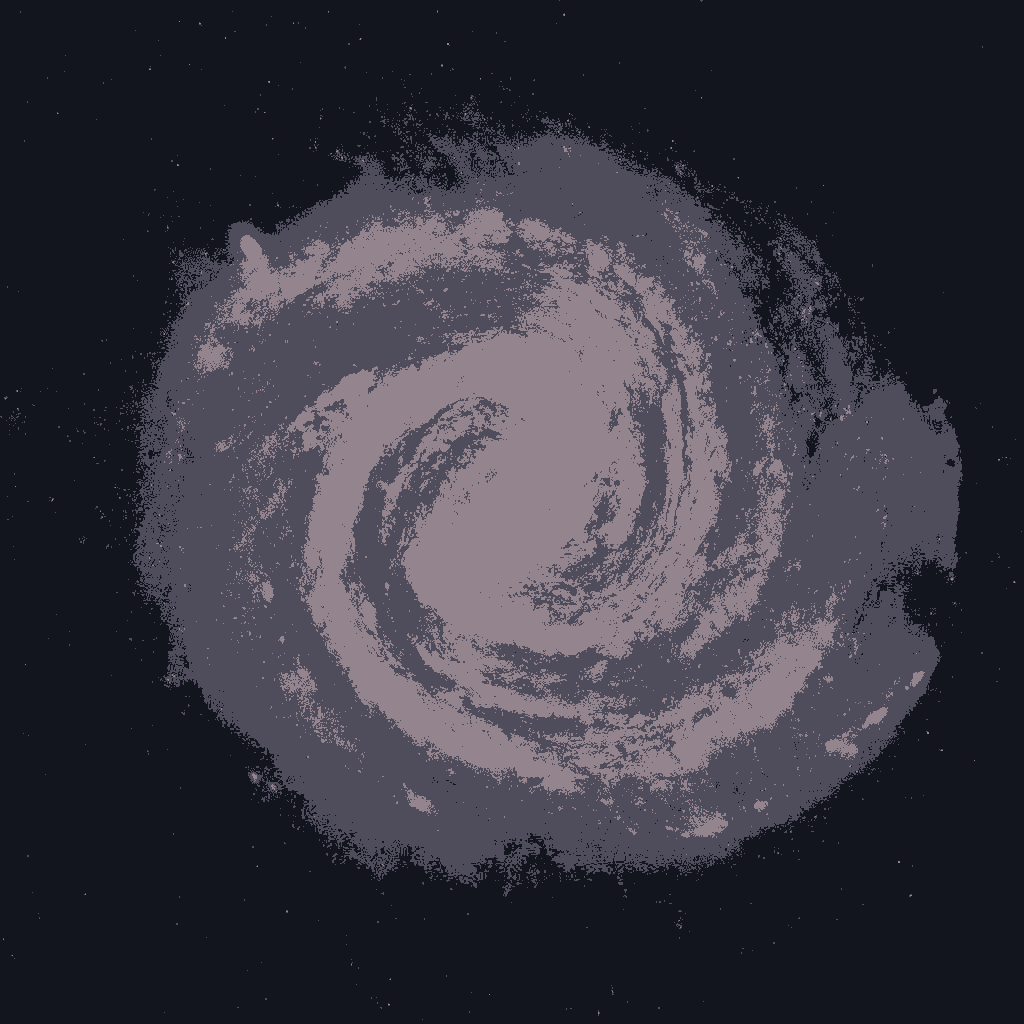

Segmented RGB image displayed using 3 clusters.
Centroid values used: [[ 79.32160628  76.85782975  91.30497549]
 [147.64128139 132.32935287 141.98761005]
 [ 18.05892138  21.80548059  30.3699491 ]]


In [49]:
from PIL import Image

def display_segmented_image_from_fuzzy_rgb(U_final, original_image_shape, C_final):

    cluster_membership = np.argmax(U_final, axis=1)
    segmented_pixels_rgb = C_final[cluster_membership].astype(np.uint8)
    segmented_image_array = segmented_pixels_rgb.reshape(original_image_shape)
    display(Image.fromarray(segmented_image_array, 'RGB'))

    print(f"Segmented RGB image displayed using {U_final.shape[1]} clusters.")
    print(f"Centroid values used: {C_final}")

display_segmented_image_from_fuzzy_rgb(U_final, (1024, 1024, 3), C_final)